In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets load Boston Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
cal = fetch_california_housing()

In [4]:
cal.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(cal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(cal.target)  #values of target variable. The target variable is the median house value for California districts

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
print(cal.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing the Dataset

In [8]:
df = pd.DataFrame(cal.data, columns=cal.feature_names)
df['Med_House_Val']= cal.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_House_Val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.info() #to check the data if any columns with nulls are present, datatype of each column etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   Med_House_Val  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
df.describe() #to get stats summary of data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_House_Val
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
df.shape  #to find length , size of data

(20640, 9)

Checking Missing Values

In [12]:
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
Med_House_Val    0
dtype: int64

Exploratory Data Analysis

In [13]:
df.corr() # by default pearson correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_House_Val
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Med_House_Val,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


From this correlation, we can say

We have to check for multicollinearity, if there is a high correlation between 2 or more independant feature, then we can drop one of the independant features and take the other one 

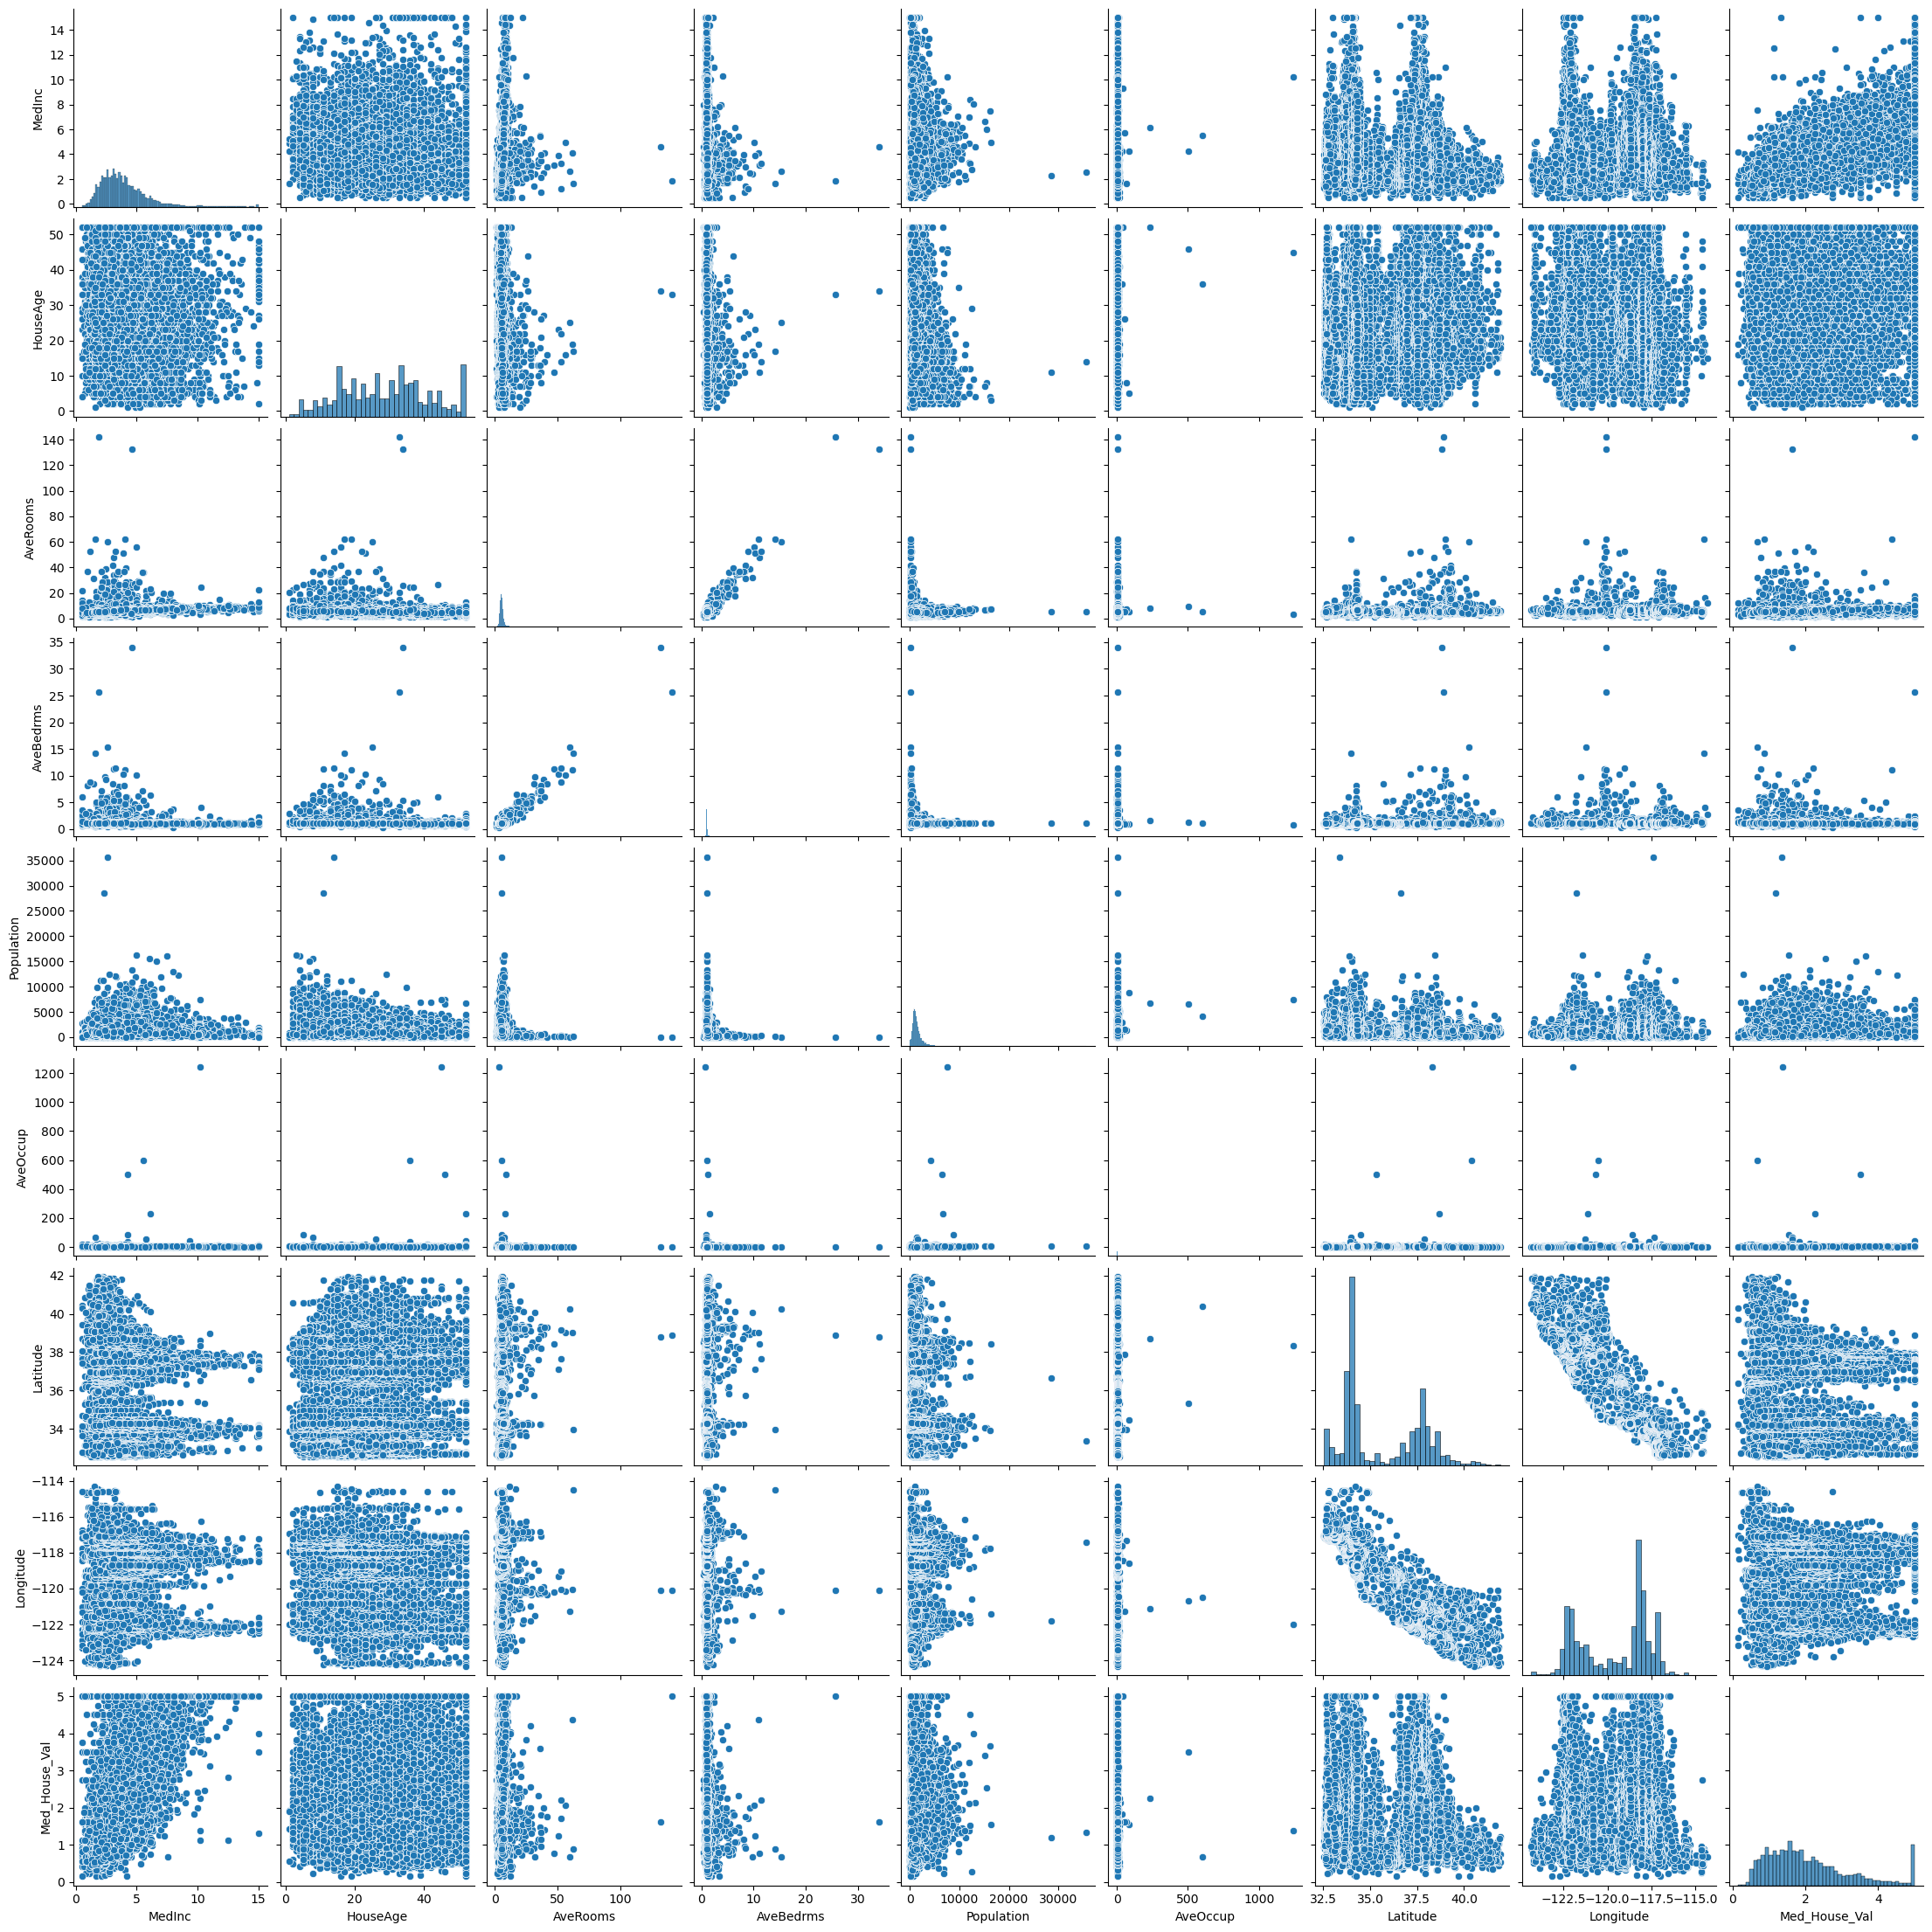

In [14]:
sns.pairplot(df)
plt.show()

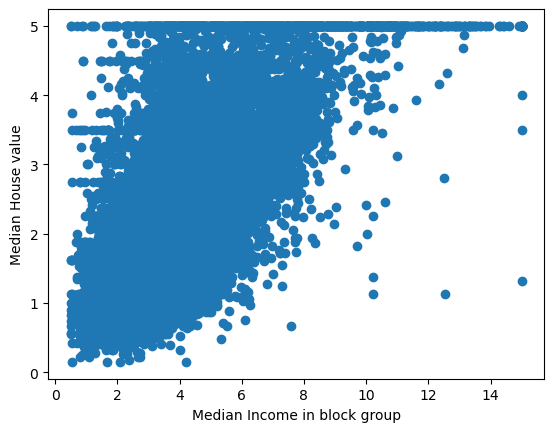

In [15]:
plt.scatter(df['MedInc'],df['Med_House_Val'])
plt.xlabel("Median Income in block group")
plt.ylabel("Median House value")
plt.show()

Histogram of Median Income in Block Group

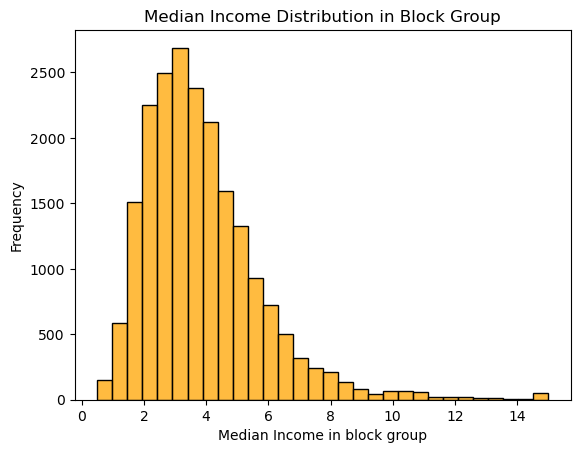

In [16]:
sns.histplot(df['MedInc'], bins=30, color='orange')
plt.title("Median Income Distribution in Block Group")
plt.xlabel("Median Income in block group")
plt.ylabel("Frequency")
plt.show()

Histogram of house age

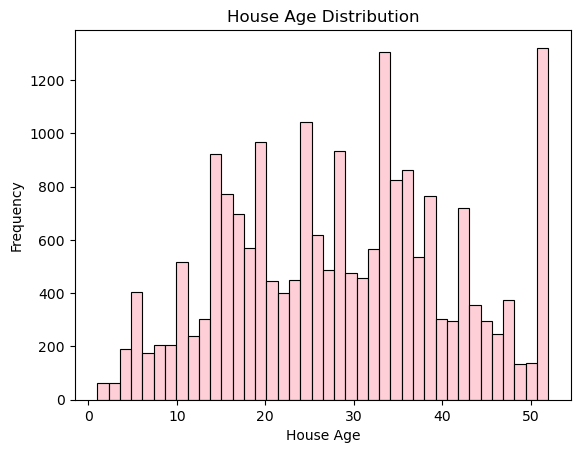

In [17]:
sns.histplot(df['HouseAge'], bins=40, color='pink')
plt.title("House Age Distribution")
plt.xlabel("House Age")
plt.ylabel("Frequency")
plt.show()

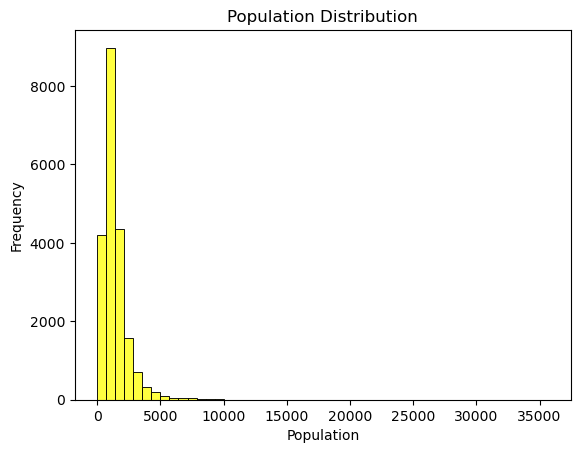

In [18]:
sns.histplot(df['Population'], bins=50, color='yellow')
plt.title("Population Distribution")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

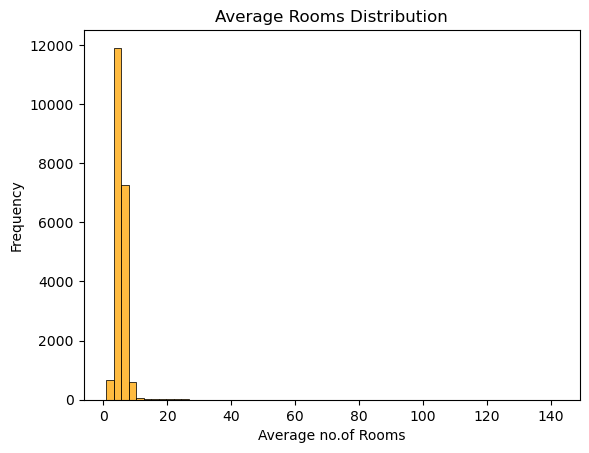

In [19]:
sns.histplot(df['AveRooms'], bins=60, color='orange')
plt.title("Average Rooms Distribution")
plt.xlabel("Average no.of Rooms")
plt.ylabel("Frequency")
plt.show()

In [20]:
# def narcissist( value ):
#     digit_counter = 0
#     dup = value
#     n = 0
#     a = []
#     while(dup!=0):
#         r = dup%10
#         a.append(int(r))
#         digit_counter = digit_counter + 1
#         dup = int(dup/10)
#     print("count of digits: ",digit_counter)
#     print("all digits: ",a)
#     if(digit_counter == 1):
#         n=value
#     else:
#         for i in range(0,digit_counter):
#             print("elements: ",a[i])
#             n = n + a[i]**digit_counter
#             print(n)
#     if (n == value):
#         return True
#     else:
#         return False 

# narcissist(4887)

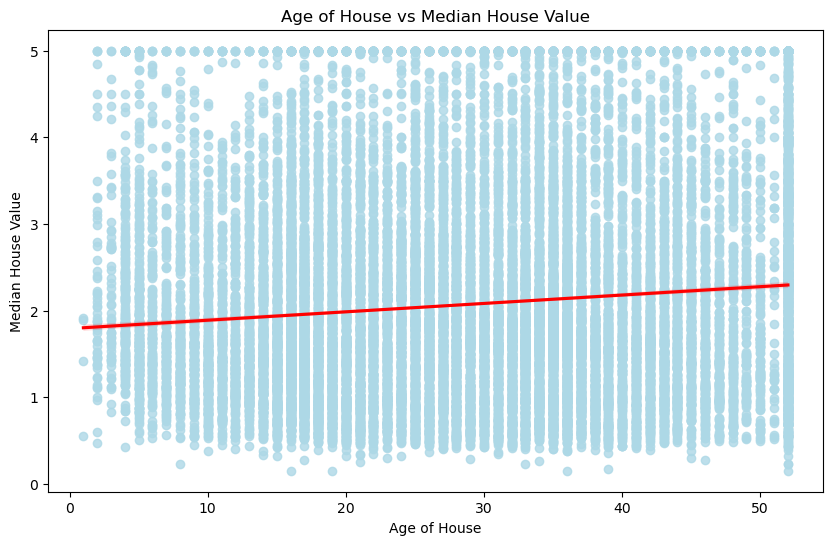

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x="HouseAge", y="Med_House_Val", data=df, scatter_kws={'color': 'lightblue'},   # Blue dots
    line_kws={'color': 'red'})
plt.title("Age of House vs Median House Value")
plt.xlabel("Age of House")
plt.ylabel("Median House Value")
plt.show()

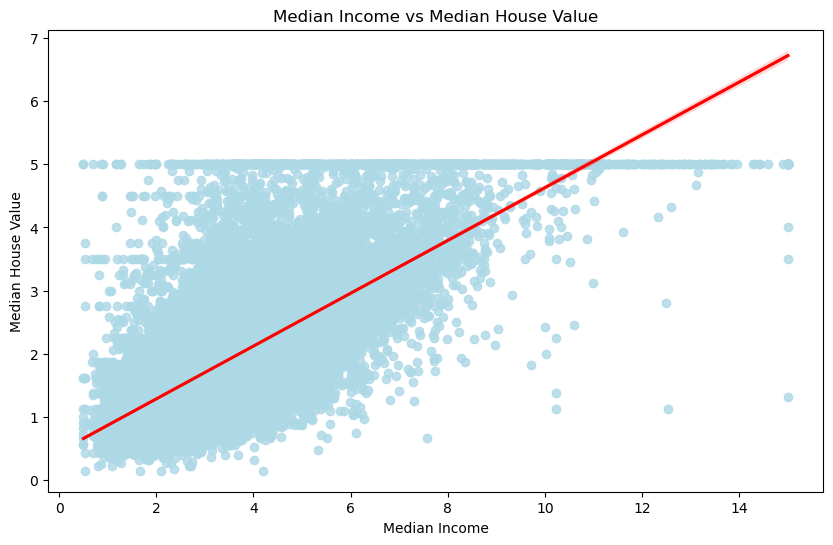

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x="MedInc", y="Med_House_Val", data=df, scatter_kws={'color': 'lightblue'},   # Blue dots
    line_kws={'color': 'red'})
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

Original shape: (20640, 9)
After removing outliers: (19959, 9)


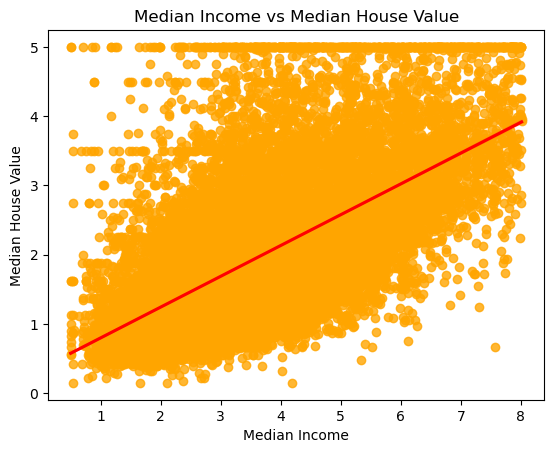

In [23]:
# Calculate IQR
Q1 = df['MedInc'].quantile(0.25)
Q3 = df['MedInc'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['MedInc'] >= lower_bound) & (df['MedInc'] <= upper_bound)]

print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")

sns.regplot(x="MedInc", y="Med_House_Val", data=df_no_outliers, scatter_kws={'color': 'orange'},   # Blue dots
    line_kws={'color': 'red'})
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

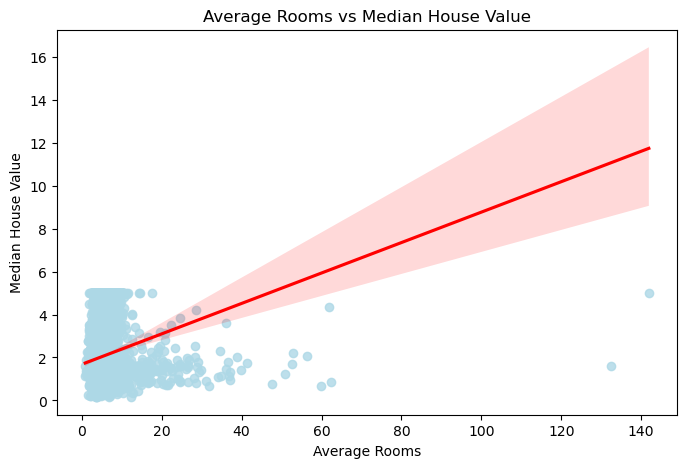

In [24]:
plt.figure(figsize=(8, 5))
sns.regplot(x="AveRooms", y="Med_House_Val", data=df, scatter_kws={'color': 'lightblue'},   # Blue dots
    line_kws={'color': 'red'})
plt.title("Average Rooms vs Median House Value")
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.show()

Original shape: (20640, 9)
After removing outliers: (19570, 9)


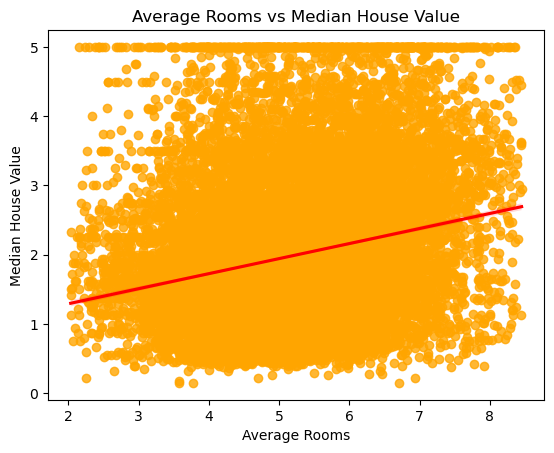

In [25]:
# Calculate IQR
Q1 = df['AveRooms'].quantile(0.25)
Q3 = df['AveRooms'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers_1 = df_no_outliers[(df_no_outliers['AveRooms'] >= lower_bound) & (df_no_outliers['AveRooms'] <= upper_bound)]

print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers_1.shape}")

sns.regplot(x="AveRooms", y="Med_House_Val", data=df_no_outliers_1, scatter_kws={'color': 'orange'},   # Blue dots
    line_kws={'color': 'red'})
plt.title("Average Rooms vs Median House Value")
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.show()


We can see the outliers here in Average rooms, so we removed these, and tried to see new plots

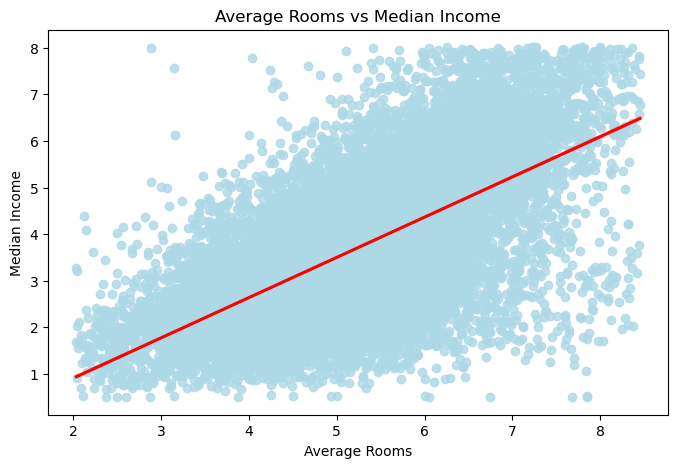

In [26]:
plt.figure(figsize=(8, 5))
sns.regplot(x="AveRooms", y="MedInc", data=df_no_outliers_1, scatter_kws={'color': 'lightblue'},   # Blue dots
    line_kws={'color': 'red'})
plt.title("Average Rooms vs Median Income")
plt.xlabel("Average Rooms")
plt.ylabel("Median Income")
plt.show()

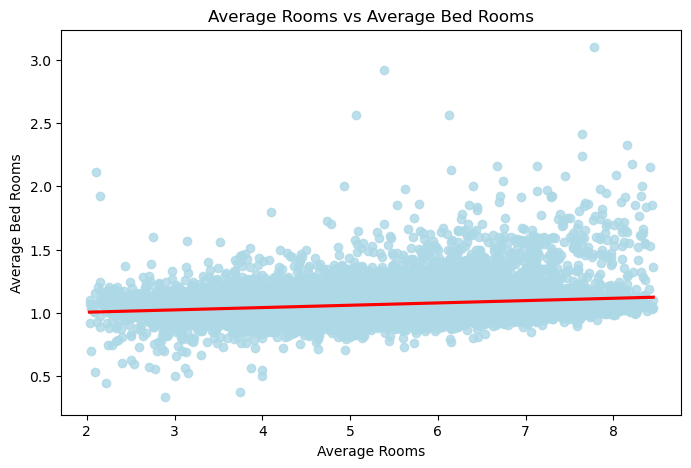

In [27]:
plt.figure(figsize=(8, 5))
sns.regplot(x="AveRooms", y="AveBedrms", data=df_no_outliers_1, scatter_kws={'color': 'lightblue'},   # Blue dots
    line_kws={'color': 'red'})
plt.title("Average Rooms vs Average Bed Rooms")
plt.xlabel("Average Rooms")
plt.ylabel("Average Bed Rooms")
plt.show()

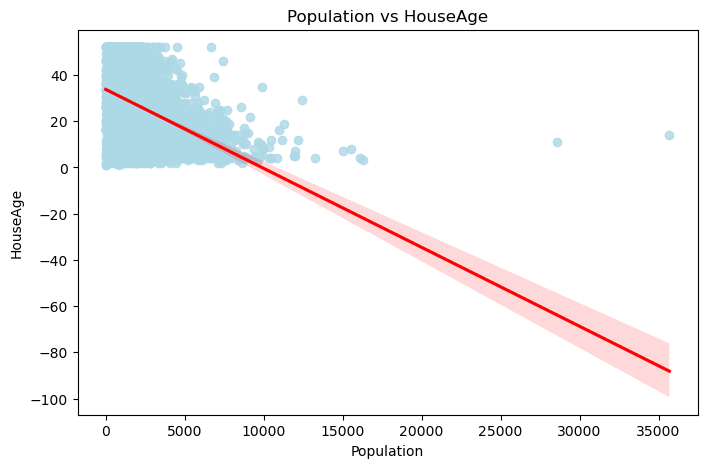

In [28]:
plt.figure(figsize=(8, 5))
sns.regplot(x="Population", y="HouseAge", data=df_no_outliers_1, scatter_kws={'color': 'lightblue'},   # Blue dots
    line_kws={'color': 'red'})
plt.title("Population vs HouseAge")
plt.xlabel("Population")
plt.ylabel("HouseAge")
plt.show()

Outliers present in Population

Original shape: (20640, 9)
After removing outliers: (18422, 9)


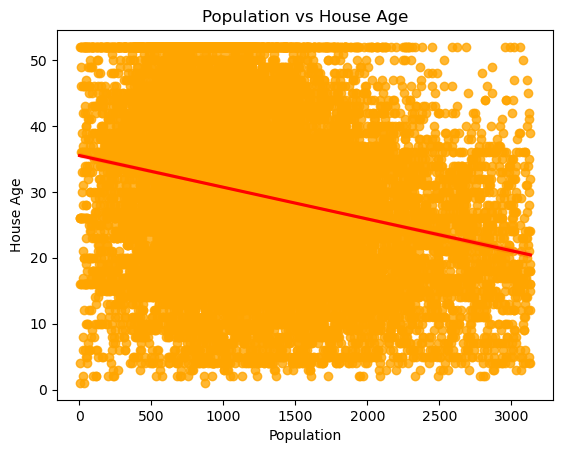

In [29]:
# Calculate IQR
Q1 = df['Population'].quantile(0.25)
Q3 = df['Population'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers_2 = df_no_outliers_1[(df_no_outliers_1['Population'] >= lower_bound) & (df_no_outliers_1['Population'] <= upper_bound)]

print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers_2.shape}")

sns.regplot(x="Population", y="HouseAge", data=df_no_outliers_2, scatter_kws={'color': 'orange'},   # Blue dots
    line_kws={'color': 'red'})
plt.title("Population vs House Age")
plt.xlabel("Population")
plt.ylabel("House Age")
plt.show()


## Independant and Dependant features

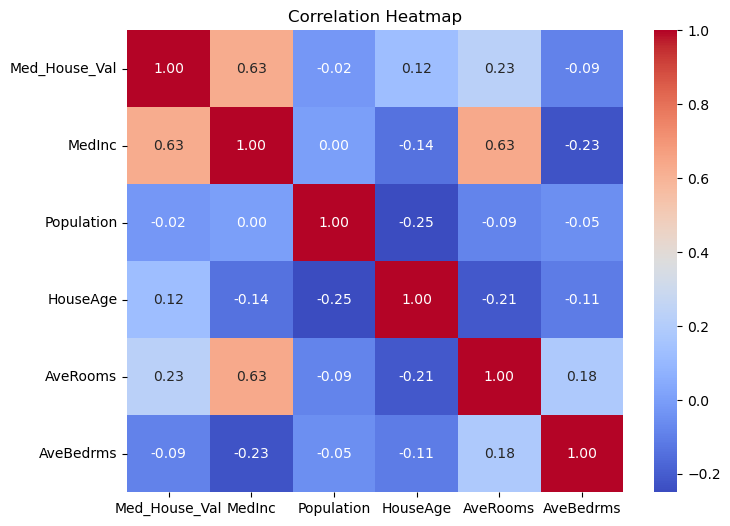

Med_House_Val    1.000000
MedInc           0.626871
AveRooms         0.226829
HouseAge         0.123824
Population      -0.022409
AveBedrms       -0.090036
Name: Med_House_Val, dtype: float64

In [30]:
cor_x = df_no_outliers_2[['Med_House_Val', 'MedInc', 'Population', 'HouseAge', 'AveRooms', 'AveBedrms']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(cor_x, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

cor_x['Med_House_Val'].sort_values(ascending=False)

In [31]:
X_ = df_no_outliers_2[['MedInc', 'Population', 'HouseAge', 'AveRooms', 'AveBedrms']]
y_ = df_no_outliers_2['Med_House_Val']

# Adding constant for intercept
X_ = sm.add_constant(X_)

model = sm.OLS(y_, X_).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Med_House_Val   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     3783.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        10:03:14   Log-Likelihood:                -20959.
No. Observations:               18422   AIC:                         4.193e+04
Df Residuals:                   18416   BIC:                         4.198e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2355      0.066    -18.720      0.0

How to interpret the output:

coef: The estimated impact of each variable on Med_House_Val.

P>|t| (p-value):

If p < 0.05, the variable is statistically significant (i.e., it has a meaningful relationship with house value).

If p > 0.05, the variable may not be important (you can consider dropping it).

### Simple Regression

In [32]:
# Removed Population, since coefficient was very small in prev step as not strongly co-related

# Defining X and y
X = df_no_outliers_2[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']]
y = df_no_outliers_2['Med_House_Val']
print(X.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)

# Fitting OLS model
model_ols = sm.OLS(y, X_scaled).fit()
print(model_ols.summary())

   MedInc  HouseAge  AveRooms  AveBedrms
2  7.2574      52.0  8.288136   1.073446
3  5.6431      52.0  5.817352   1.073059
4  3.8462      52.0  6.281853   1.081081
5  4.0368      52.0  4.761658   1.103627
6  3.6591      52.0  4.931907   0.951362
                            OLS Regression Results                            
Dep. Variable:          Med_House_Val   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     4729.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        10:03:14   Log-Likelihood:                -20960.
No. Observations:               18422   AIC:                         4.193e+04
Df Residuals:                   18417   BIC:                         4.197e+04
Df Model:                           4                                         
Covariance Type:            nonrobust      

### We are scaling X and not y
We can scale y (e.g., y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))),
but we usually don’t need to when using OLS regression for interpretation — only when using models that care about the magnitude of y (e.g., neural networks, regularized regression, etc.).

🧠 Here’s the reasoning:

✅ When not scaling y (our current OLS case)

We want to interpret coefficients in the original units of the target:
Example: “For each 1 standard deviation increase in MedInc, the median house value increases by β units.”
Keeping y in original units means the predicted values and errors (residuals) are interpretable (e.g., in $100k’s).

👉 So in most econometrics-style linear regressions (like with statsmodels.OLS),
you scale only the X features, not y.

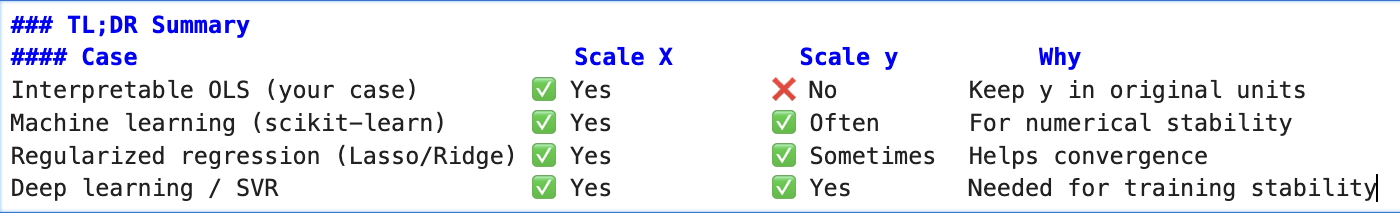

#### So to conclude, we will perform linear regression on Y ['Med_House_Val'] and X ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']

## Splitting, Training, Testing Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.32, random_state=42)

In [34]:
X_train

array([[ 1.        ,  0.00193618,  0.44421541,  0.15039301, -0.95568803],
       [ 1.        ,  1.60693314, -0.53152072, -0.24430812,  1.18104335],
       [ 1.        ,  0.29074114,  0.52552676, -0.59994366,  0.96327221],
       ...,
       [ 1.        ,  0.79640292, -0.53152072,  1.07689179, -0.04874102],
       [ 1.        ,  0.91593403,  0.20028138,  1.22339214, -0.30627779],
       [ 1.        ,  0.79782029, -0.28758669,  0.07321815, -0.70975652]])

In [35]:
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [36]:
y_train.iloc[0]

np.float64(1.738)

In [37]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
print("\nIntercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X_scaled, model.coef_):
    print(f"  {feature}: {coef:.4f}")


Intercept: 1.9874716716743446
Coefficients:
  [1.         2.43953375 1.82650827 2.85253069 0.08903887]: 0.0000
  [1.         1.34998514 1.82650827 0.58700944 0.08568404]: 0.9996
  [1.         0.13719328 1.82650827 1.0129222  0.15522884]: 0.2121
  [ 1.          0.26583601  1.82650827 -0.38098138  0.35069159]: -0.3899
  [ 1.          0.01091282  1.82650827 -0.22487636 -0.96937995]: 0.2227


  MedInc: 0.9996
  
  HouseAge: 0.2121
  
  AveRooms: -0.3899
  
  AveBedrms: 0.2227
  

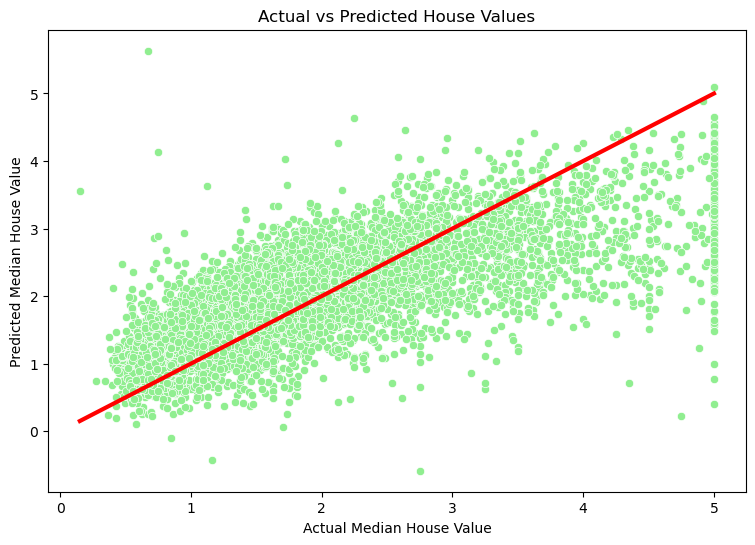

In [40]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=y_test, y=y_pred, color='lightgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.show()

In [41]:
df_result_compare = pd.DataFrame(y_test)
df_result_compare = df_result_compare.rename(columns={"Med_House_Val":"Med_House_Val_test"})
df_result_compare['Med_House_Val_pred']=y_pred
df_result_compare.head(15)

,Med_House_Val_test,Med_House_Val_pred
6704,1.639,2.271180
7109,1.887,2.063920
17362,1.936,2.119105
7166,1.092,1.890013
17344,1.681,1.689129
10237,1.763,1.958162
7605,1.032,1.654057
19196,1.783,2.193611
12255,1.207,0.579666
3482,1.521,2.673341


In [42]:
# error calculation
df_result_compare['residuals'] = df_result_compare['Med_House_Val_test'] - df_result_compare['Med_House_Val_pred']
df_result_compare.head(15)

,Med_House_Val_test,Med_House_Val_pred,residuals
6704,1.639,2.271180,-0.632180
7109,1.887,2.063920,-0.176920
17362,1.936,2.119105,-0.183105
7166,1.092,1.890013,-0.798013
17344,1.681,1.689129,-0.008129
10237,1.763,1.958162,-0.195162
7605,1.032,1.654057,-0.622057
19196,1.783,2.193611,-0.410611
12255,1.207,0.579666,0.627334
3482,1.521,2.673341,-1.152341


#### Residuals Distribution

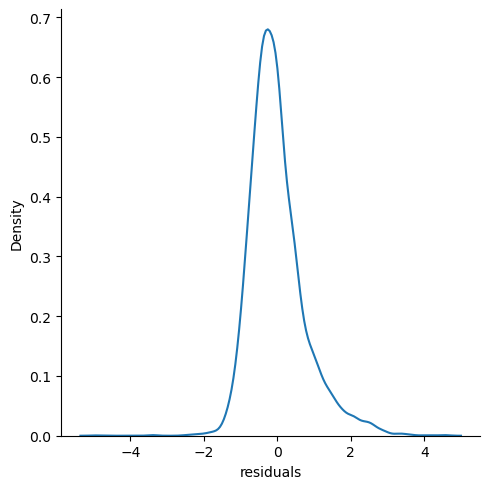

In [43]:
sns.displot(df_result_compare['residuals'], kind='kde')
plt.show()

Almost a normal distribution little skewed on right , so we can conclude, model is performing fairly well

#### Scatter plot of Predictions & Residuals

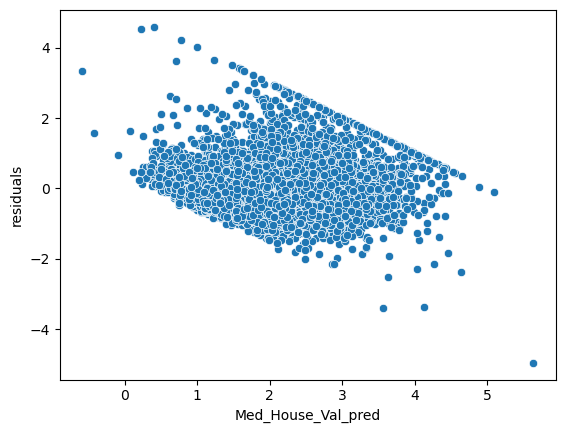

In [44]:
sns.scatterplot(x='Med_House_Val_pred', y='residuals', data=df_result_compare)
plt.show()

#### Metrics

In [45]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("R-squared error: ", r2)
print("mean-squared error: ", mse)
print("Root-mean-squared error: ", rmse)

R-squared error:  0.5124776981767634
mean-squared error:  0.5721839745145558
Root-mean-squared error:  0.7564284331743194


In [46]:
n = len(df_result_compare)
k = X.shape[1]                     # no.of features considered in training (X)
print(k)

4


In [47]:
Adjusted_R2 = 1-(1-r2)*(n-1)/(n-k-1)
print("R-squared error: ", Adjusted_R2)

R-squared error:  0.5121466696234969


### New Data Prediction

In [48]:
X_scaled[0][1:]

array([2.43953375, 1.82650827, 2.85253069, 0.08903887])

In [49]:
X_scaled[0][1:].reshape(1, -1).flatten()

array([2.43953375, 1.82650827, 2.85253069, 0.08903887])

In [50]:
scaler.transform(X_scaled[0][1:].reshape(1, -1))

array([[-0.81221591, -2.2531658 , -2.13150614, -8.44534278]])

In [51]:
y_pred_0 = model.predict([[1.0, -0.81221591, -2.2531658 , -2.13150614, -8.44534278]])
y_pred_0

array([-0.35209786])

Only X was scaled, y was not , so y is already in original units

### Pickling the model file for deployment

In [52]:
pickle.dump(model, open('./regression_model.pkl', 'wb'))

In [53]:
pickel_model = pickle.load(open('./regression_model.pkl', 'rb'))

In [54]:
pickel_model.predict([[1.0, -0.81221591, -2.2531658 , -2.13150614, -8.44534278]])

array([-0.35209786])